In [109]:
!pip install rdkit-pypi

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from rdkit import Chem
from rdkit.Chem import Descriptors
from statistics import mean

### Dataset 1 (https://github.com/theochem/B3DB)

In [111]:
data_1 = pd.read_csv('B3DB.tsv', sep='\t')
data_1.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [112]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO.            7807 non-null   int64  
 1   compound_name  6698 non-null   object 
 2   IUPAC_name     6170 non-null   object 
 3   SMILES         7807 non-null   object 
 4   CID            6170 non-null   float64
 5   logBB          1058 non-null   float64
 6   BBB+/BBB-      7807 non-null   object 
 7   Inchi          7807 non-null   object 
 8   threshold      3621 non-null   float64
 9   reference      7807 non-null   object 
 10  group          7807 non-null   object 
 11  comments       18 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 732.0+ KB


In [113]:
data_1 = data_1[['SMILES', 'logBB']]


In [114]:
data_1['SMILES'] = data_1['SMILES'].apply(lambda smi: Chem.CanonSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(smi))))

In [115]:
data_1.head()

,SMILES,logBB
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,-2.69
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,-2.52
2,Oc1c(I)cc(Cl)c2cccnc12,-2.40
3,CCNC(=NCCSCc1ncccc1Br)NC#N,-2.15
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,-2.15


In [116]:
data_1['logBB'] = data_1['logBB'].fillna(-1e9)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  7807 non-null   object 
 1   logBB   7807 non-null   float64
dtypes: float64(1), object(1)
memory usage: 122.1+ KB


In [117]:
data_1 = data_1[data_1['logBB'] > -1e9]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 0 to 1057
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  1058 non-null   object 
 1   logBB   1058 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.8+ KB


In [118]:
data_1 = data_1.rename(columns={'SMILES':'SMILES', 'logBB':'Activity'})
data_1.head()

,SMILES,Activity
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,-2.69
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,-2.52
2,Oc1c(I)cc(Cl)c2cccnc12,-2.40
3,CCNC(=NCCSCc1ncccc1Br)NC#N,-2.15
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,-2.15


In [119]:
data_1.drop_duplicates()

,SMILES,Activity
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,-2.69
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,-2.52
2,Oc1c(I)cc(Cl)c2cccnc12,-2.40
3,CCNC(=NCCSCc1ncccc1Br)NC#N,-2.15
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,-2.15
...,...,...
1053,CN(C)CCC(c1ccc(Cl)cc1)c1ccccn1,1.53
1054,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,1.60
1055,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1.60
1056,FC(F)(F)c1ccc(N2CCNCC2)nc1Cl,1.64


### Dataset 2 (https://github.com/znavoyan/vae-embeddings/, article: https://doi.org/10.1186/s13321-022-00648-x)

In [120]:
data_2 = pd.read_csv('final_logBB_2967.csv')
data_2.head()

,InchiKey,smiles,new_logBB,new_BBclass,canon_smiles
0,AABLHGPVOULICI-UHFFFAOYSA-N,CN1CCC24C3Oc5c(O)ccc(CC1C2(O)CCC3O)c45,NaN,1,CN1CCC23c4c5ccc(O)c4OC2C(O)CCC3(O)C1C5
1,AAOVKJBEBIDNHE-UHFFFAOYSA-N,c1c(Cl)ccc(c12)N(C)C(=O)CN=C2c3ccccc3,0.330807,1,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21
2,AAQOQKQBGPPFNS-UHFFFAOYSA-N,CC[N+](C)(C)CC=1C=CC=CC=1[Br],NaN,0,CC[N+](C)(C)Cc1ccccc1Br
3,AAXVEMMRQDVLJB-UHFFFAOYSA-N,CC34CC(O)C1(F)C(CCC2=CC(=O)CCC12C)C3CCC4(O)C(=...,NaN,1,CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)...
4,ABQYZRZVRIPTPI-UHFFFAOYSA-M,COn1cc(C(=O)[O-])c(=O)c2cc3c(cc21)OCO3,-0.920500,1,COn1cc(C(=O)[O-])c(=O)c2cc3c(cc21)OCO3


In [121]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InchiKey      2967 non-null   object 
 1   smiles        2967 non-null   object 
 2   new_logBB     978 non-null    float64
 3   new_BBclass   2967 non-null   int64  
 4   canon_smiles  2967 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 116.0+ KB


In [122]:
data_2 = data_2[['canon_smiles', 'new_logBB']]

In [123]:
data_2 = data_2.rename(columns={'canon_smiles':'SMILES', 'new_logBB':'Activity'})
data_2.head()

,SMILES,Activity
0,CN1CCC23c4c5ccc(O)c4OC2C(O)CCC3(O)C1C5,NaN
1,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,0.330807
2,CC[N+](C)(C)Cc1ccccc1Br,NaN
3,CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)...,NaN
4,COn1cc(C(=O)[O-])c(=O)c2cc3c(cc21)OCO3,-0.920500


In [124]:
data_2['Activity'] = data_2['Activity'].fillna(-1e9)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    2967 non-null   object 
 1   Activity  2967 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.5+ KB


In [125]:
data_2 = data_2[data_2['Activity'] > -1e9]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 1 to 2966
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    978 non-null    object 
 1   Activity  978 non-null    float64
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


In [126]:
data_2['Activity'] = data_2['Activity'].apply(lambda x: round(x, 2))

In [127]:
data_2['SMILES'].nunique()

978

In [128]:
data_1_smiles = data_1['SMILES'].tolist()
data_2_smiles = data_2['SMILES'].tolist()

In [129]:
smiles_both = []

for smi in data_2_smiles:
    if smi in data_1_smiles:
        smiles_both.append(smi)
len(smiles_both)

653

In [130]:
only_data_2_smiles = list(set(data_2_smiles) - set(smiles_both))
len(only_data_2_smiles)

325

In [131]:
for i, row in data_2.iterrows():
    if row.SMILES in smiles_both:
        data_2 = data_2.drop(labels=[i], axis=0)
len(data_2)

325

### Merge

In [132]:
final_data = pd.concat([data_1, data_2], ignore_index=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    1383 non-null   object 
 1   Activity  1383 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.7+ KB


In [133]:
final_data.describe()

,Activity
count,1383.000000
mean,-0.200615
std,1.720540
min,-25.320000
25%,-0.595000
50%,-0.020000
75%,0.445000
max,1.700000


<Axes: >

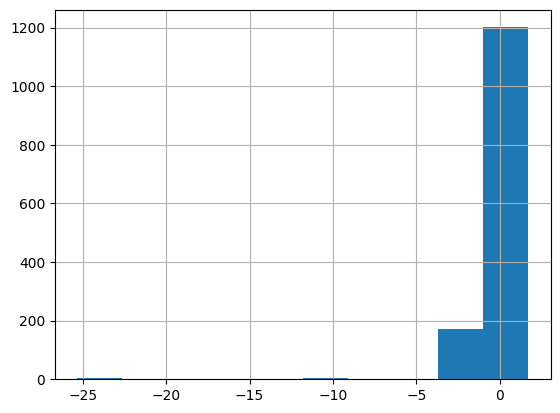

In [134]:
final_data['Activity'].hist()

<Axes: xlabel='Activity'>

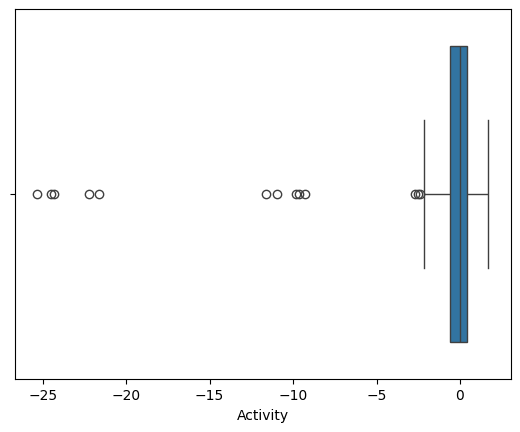

In [135]:
sns.boxplot(x=final_data['Activity'])

In [136]:
lower_bound = round(-0.200615 - 1.720540 * 3, 2)
upper_bound = round(-0.200615 + 1.720540 * 3, 2)
print(lower_bound)
print(upper_bound)

-5.36
4.96


In [137]:
for i, row in final_data.iterrows():
    if row.Activity < lower_bound or row.Activity > upper_bound:
        final_data = final_data.drop(labels=[i], axis=0)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373 entries, 0 to 1382
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    1373 non-null   object 
 1   Activity  1373 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [138]:
final_data.reset_index(drop=True, inplace=True)

In [139]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    1373 non-null   object 
 1   Activity  1373 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.6+ KB


In [140]:
final_data.to_csv('final_dataset_logbb.csv',index=False)